In [1]:
import numpy as np
import pandas as pd
import scipy.signal as signal

In [87]:
data = pd.read_csv('../Data/data_s_1406_2.csv',sep=';')
data.head()

,23826,868231,Unnamed: 2
0,31128,1707770,NaN
1,31124,1711848,NaN
2,31124,1711874,NaN
3,31123,1711869,NaN
4,31116,1711913,NaN


In [88]:
x = data[data.columns[1]].to_numpy()
x = x[5:-1]
x = x - np.mean(x)

In [89]:
order = 5
sampling_freq = 100
number_of_samples = x.shape[0]
time=np.linspace(0, (1/sampling_freq)*number_of_samples, num=number_of_samples, endpoint=False)
cutoff_freq = 4
normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = signal.butter(order, normalized_cutoff_freq,btype='low')
#Filtrado
filtered_signal_x = signal.lfilter(numerator_coeffs, denominator_coeffs, x)

cutoff_freq = 0.5
normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = signal.butter(order, normalized_cutoff_freq,btype='high')
#Filtrado
filtered_signal_x = signal.lfilter(numerator_coeffs, denominator_coeffs, filtered_signal_x)

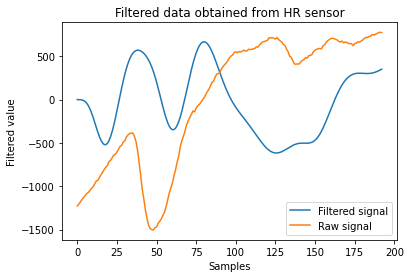

In [90]:
import matplotlib.pyplot as plt
plt.plot(filtered_signal_x)
plt.plot(x)
plt.legend(['Filtered signal','Raw signal'])
plt.xlabel('Samples')
plt.ylabel('Filtered value')
plt.title('Filtered data obtained from HR sensor')
plt.show()

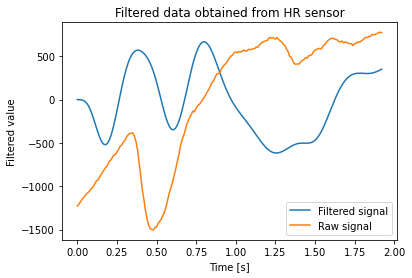

In [91]:
time=np.linspace(0, (1/sampling_freq)*number_of_samples, num=number_of_samples, endpoint=False)
plt.plot(time,filtered_signal_x)
plt.plot(time,x)
plt.legend(['Filtered signal','Raw signal'])
plt.xlabel('Time [s]')
plt.ylabel('Filtered value')
plt.title('Filtered data obtained from HR sensor')
plt.show()

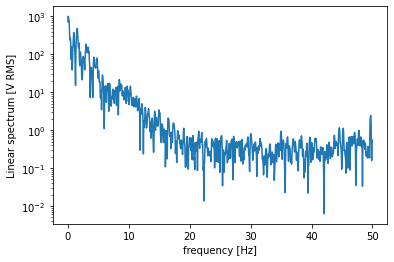

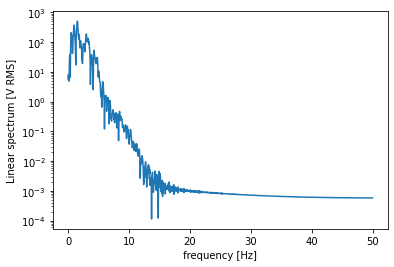

In [82]:
f, Pxx_spec = signal.periodogram(x, 100, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
f, Pxx_spec = signal.periodogram(filtered_signal_x, 100, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

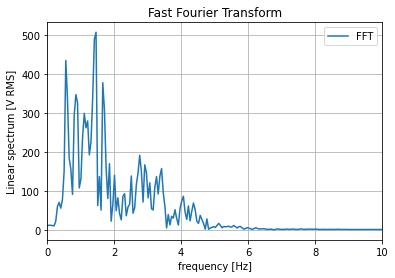

In [83]:
from scipy.fft import fft,fftfreq
fig, ax = plt.subplots()
N = len(x)
T = 1/100.0
y = filtered_signal_x
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Fast Fourier Transform')
# plt.axvline(xf[np.argmax(2.0/N * np.abs(yf[0:N//2]))], color='green') # cutoff frequency
plt.xlim(0,10)
plt.legend(['FFT','Maximum'])
# ax.annotate('f = 1.1 Hz',
#             xy=(.25, .8), xycoords='figure fraction',
#             horizontalalignment='left', verticalalignment='top',
#             fontsize=12)
plt.grid()
plt.show()

In [84]:
freq = xf[np.argmax(2.0/N * np.abs(yf[0:N//2]))]
freq

1.455092824887105

In [85]:
bpm = freq*60

In [86]:
bpm

87.3055694932263